
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [2]:
#
# Import relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
#

In [3]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


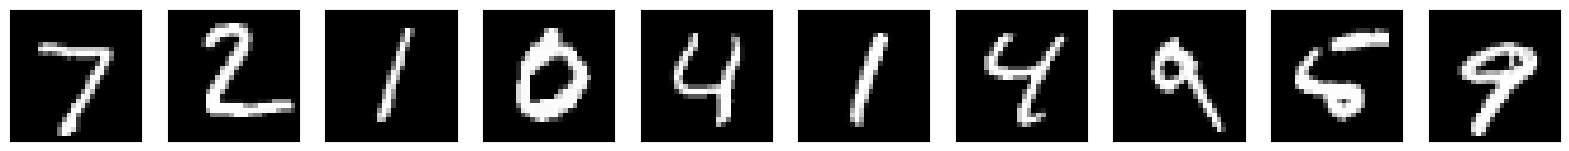

In [4]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [5]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))


#
# Add as many hidden layers in the encoder network of your choise
#
#

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [15]:
# print the encoder model#
encoder.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 200)               80200     
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 25)                1275      
                                                                 
Total params: 420625 (1.60 MB)
Trainable params: 42062

In [16]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(50,activation="relu"))
decoder.add(Dense(25,activation="relu"))
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [17]:
# print the decoder model
decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                1300      
                                                                 
 dense_18 (Dense)            (None, 400)               20400     
                                                                 
 dense_19 (Dense)            (None, 200)               80200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 25)                1275      
                                                                 
 dense_23 (Dense)            (None, 784)              

In [19]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [20]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 25)                420625    
                                                                 
 sequential_6 (Sequential)   (None, 28, 28)            148709    
                                                                 
Total params: 569334 (2.17 MB)
Trainable params: 569334 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
autoencoder.fit(x_train, x_train, epochs=30, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1128 - accuracy: 0.2539 - val_loss: 0.1104 - val_accuracy: 0.2515
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1112 - accuracy: 0.2561 - val_loss: 0.1089 - val_accuracy: 0.2589
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1096 - accuracy: 0.2586 - val_loss: 0.1079 - val_accuracy: 0.2540
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1081 - accuracy: 0.2608 - val_loss: 0.1064 - val_accuracy: 0.2598
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1069 - accuracy: 0.2621 - val_loss: 0.1072 - val_accuracy: 0.2540
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1059 - accuracy: 0.2633 - val_loss: 0.1047 - val_accuracy: 0.2565
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1053 - accuracy: 0.2644 - val_loss: 0.1038 - val_accuracy

313/313 [==============================] - 1s 2ms/step


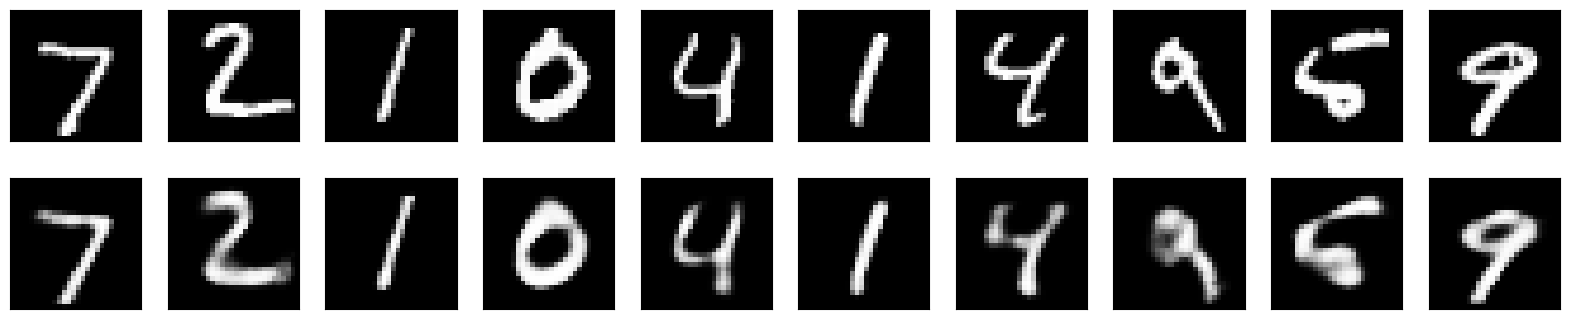

In [25]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [26]:
from tensorflow.keras.layers import GaussianNoise

In [27]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

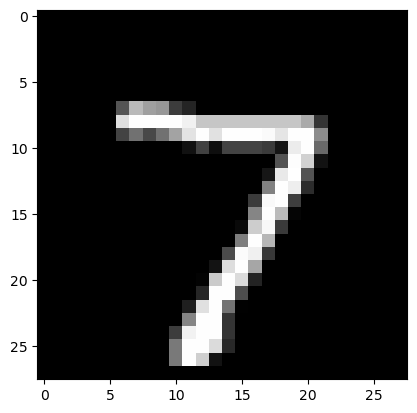

In [28]:
plt.imshow(x_test[0])

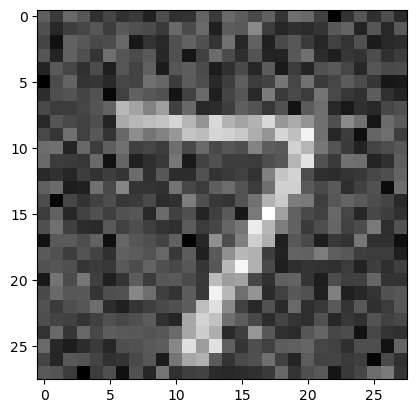

In [29]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [39]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))
#


In [40]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(25, activation='relu'))
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [41]:
noise_remover = Sequential([encoder, decoder])

In [42]:
# Compile the network as earlier
noise_remover.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
# Fit the network as earlier.
noise_remover.fit(x_train, x_train, epochs=30, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2128 - accuracy: 0.1221 - val_loss: 0.1708 - val_accuracy: 0.1732
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1626 - accuracy: 0.1839 - val_loss: 0.1513 - val_accuracy: 0.1972
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1474 - accuracy: 0.2035 - val_loss: 0.1378 - val_accuracy: 0.2150
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1391 - accuracy: 0.2140 - val_loss: 0.1326 - val_accuracy: 0.2196
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1337 - accuracy: 0.2216 - val_loss: 0.1266 - val_accuracy: 0.2320
Epoch 6/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1290 - accuracy: 0.2281 - val_loss: 0.1238 - val_accuracy: 0.2274
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1252 - accuracy: 0.2331 - val_loss: 0.1192 - val_accu

In [43]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


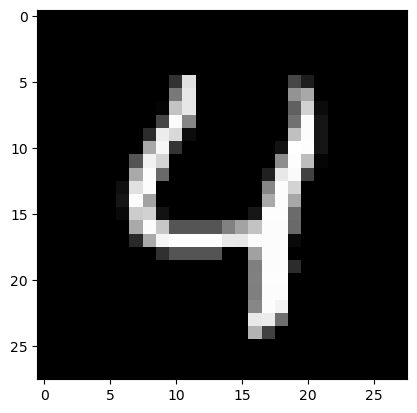

The Noisey Version


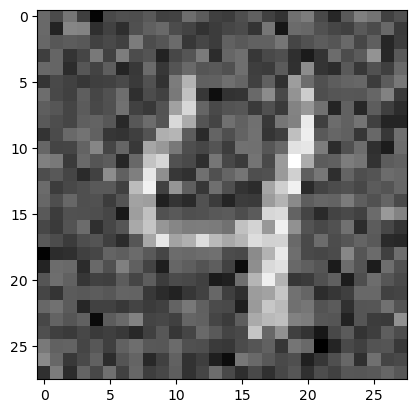

After going through denoiser


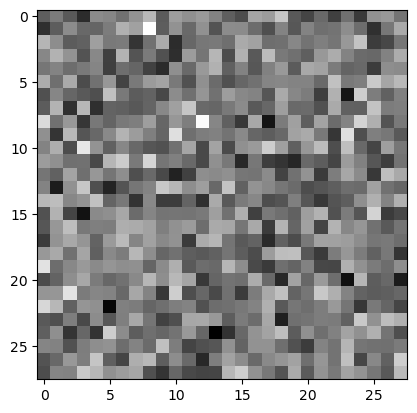

In [44]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.